# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: **Triệu Nhật Minh**
- MSSV: **21127112**
- Lớp: **21CLC02**

# Import

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex
from sklearn.model_selection import KFold
import seaborn as sns # heatmap
# Import thêm dữ thư viện nếu cần

# Tạo dictionary chứa tên các cột

In [363]:
dict_columns = {1: 'Gender', 2: '10percentage', 3: '12percentage', 4: 'CollegeTier', 5: 'Degree', 6: 'collegeGPA', 7: 'CollegeCityTier', 8: 'English', 9: 'Logical', 10: 'Quant', 11: 'Domain', 12: 'ComputerProgramming', 13: 'ElectronicsAndSemicon', 14: 'ComputerScience', 15: 'MechanicalEngg', 16: 'ElectricalEngg', 17: 'TelecomEngg', 18: 'CivilEngg', 19: 'conscientiousness', 20: 'agreeableness', 21: 'extraversion', 22: 'nueroticism', 23: 'openess_to_experience', 24: 'Salary'}

# Đọc dữ liệu

In [364]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Sinh viên có thể sử dụng các khác nếu cần
# 1a
X_1a_train = X_train_np[:, :11]
X_1a_test = X_test_np[:, :11]

# 1b
X_1b_train = X_train_np[:, -5:]
X_1b_cons = X_1b_train[:, 0]
X_1b_agr = X_1b_train[:, 1]
X_1b_ext = X_1b_train[:, 2]
X_1b_nue = X_1b_train[:, 3]
X_1b_ope = X_1b_train[:, 4]

# 1c
X_1c_train = X_train_np[:, 7:10]
X_1c_eng = X_1c_train[:, 0]
X_1c_log = X_1c_train[:, 1]
X_1c_qua = X_1c_train[:, 2]

# Cài đặt hàm

In [365]:
# Cài đặt các hàm cần thiết ở đây

In [366]:
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T # 
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w
    
    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)   

In [367]:
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

In [368]:
def latex_text(params, dict=dict_columns):
    text = '$$\\text{Salary} = ' + str(params[0][0]) + ' \\times \\text{' + dict[1] + '}'
    for i in range(1, len(params)):
        text += str(params[i][0]) if params[i][0] < 0 else ' + ' + str(params[i][0])
        text += ' \\times \\text{' + dict[i+1] + '}'
        if i % 4 == 0:
            text += ' \\\\ '
    text += '$$'
    return text

In [369]:
def kfold_cross_model(X_train_np, y_train_np, kf, mae_arr):
    for train_index, test_index in kf.split(X_train_np):
        if (X_train_np.ndim == 1):
            X_folk_train, X_folk_test = X_train_np[train_index, None], X_train_np[test_index, None]
        else:
            X_folk_train, X_folk_test = X_train_np[train_index], X_train_np[test_index]
        y_folk_train, y_folk_test = y_train_np[train_index], y_train_np[test_index]
        
        # Train the model
        lr = OLSLinearRegression()
        lr.fit(X_folk_train, y_folk_train)
        y_folk_pred = lr.predict(X_folk_test)
        
        # Calculate the MAE and append to the array
        mae_arr.append(mae(y_folk_test, y_folk_pred))

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [370]:
# Phần code cho yêu cầu 1a

lr = OLSLinearRegression().fit(X_1a_train, y_train)

params = lr.get_params().reshape(-1,1)

y_pred_1a = lr.predict(X_1a_test)

In [371]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae_1a = mae(y_test, y_pred_1a)
mae_1a

104863.77754033195

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$

In [372]:
Latex(latex_text(params))

<IPython.core.display.Latex object>

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [373]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Shuffle k = 20 (k-fold cross validation)
k = 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Tạo mảng chứa các mảng MAE của các đặc trưng
mae_cons = []
mae_agr = []
mae_ext = []
mae_nue = []
mae_ope = []

### **conscientiousness**

In [374]:
kfold_cross_model(X_1b_cons, y_train_np, kf, mae_cons)
print('MAE: ', np.mean(mae_cons))

MAE:  306221.75562170806


### **agreeableness**

In [375]:
kfold_cross_model(X_1b_agr, y_train_np, kf, mae_agr)
print('MAE: ', np.mean(mae_agr))

MAE:  300857.53034685535


### **extraversion**

In [376]:
kfold_cross_model(X_1b_ext, y_train_np, kf, mae_ext)
print('MAE: ', np.mean(mae_ext))

MAE:  307059.3991665598


### **nueroticism**

In [377]:
kfold_cross_model(X_1b_nue, y_train_np, kf, mae_nue)
print('MAE: ', np.mean(mae_nue))

MAE:  299376.1964789984


### **Openess_to_experience**

In [378]:
kfold_cross_model(X_1b_ope, y_train_np, kf, mae_ope)
print('MAE: ', np.mean(mae_ope))

MAE:  303054.52630103764


In [379]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Đặc trưng tốt nhất: Nueroticism

X_1b_best_train = np.array(X_train['nueroticism'])
X_1b_best_train = X_1b_best_train[:, None]

best_personality_feature_model = OLSLinearRegression()
best_personality_feature_model.fit(X_1b_best_train, y_train_np)

# Đánh giá mô hình trên tập kiểm tra
X_1b_best_test = np.array(X_test['nueroticism'])
X_1b_best_test = X_1b_best_test[:, None]

params = best_personality_feature_model.get_params().reshape(-1, 1)
print('Params: ', params)

Params:  [[-56546.30375318]]


In [380]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
y_pred = best_personality_feature_model.predict(X_1b_best_test)

MAE = mae(y_test, y_pred)

print('MAE:', MAE)

MAE: 291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 \times \text{nueroticism}$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [381]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Shuffle k = 20 (k-fold cross validation)
k = 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Tạo mảng chứa các mảng MAE của các đặc trưng
mae_eng = []
mae_log = []
mae_qua = []

### **English**

In [382]:
kfold_cross_model(X_1c_eng, y_train_np, kf, mae_eng)
print('MAE: ', np.mean(mae_eng))

MAE:  121901.64167007094


### **Logical**

In [383]:
kfold_cross_model(X_1c_log, y_train_np, kf, mae_log)
print('MAE: ', np.mean(mae_log))

MAE:  120304.93112741373


### **Quant**

In [384]:
kfold_cross_model(X_1c_qua, y_train_np, kf, mae_qua)
print('MAE: ', np.mean(mae_qua))

MAE:  118126.44763193061


In [385]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Đặc trưng tốt nhất: Quant

X_1c_best_train = np.array(X_train['Quant'])
X_1c_best_train = X_1c_best_train[:, None]

best_skill_feature_model = OLSLinearRegression()
best_skill_feature_model.fit(X_1c_best_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
X_1c_best_test = np.array(X_test['Quant'])
X_1c_best_test = X_1c_best_test[:, None]

params = best_skill_feature_model.get_params().reshape(-1, 1)
print('Params: ', params)

Params:  [[585.89538084]]


In [386]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
y_pred = best_skill_feature_model.predict(X_1c_best_test)

MAE = mae(y_test, y_pred)

print('MAE:', MAE)

MAE: 106819.5776198967


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 \times \text{Quant}$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [387]:
# Trình bày các phần tìm ra mô hình

## Thử nghiệm, so sánh các mô hình

In [388]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

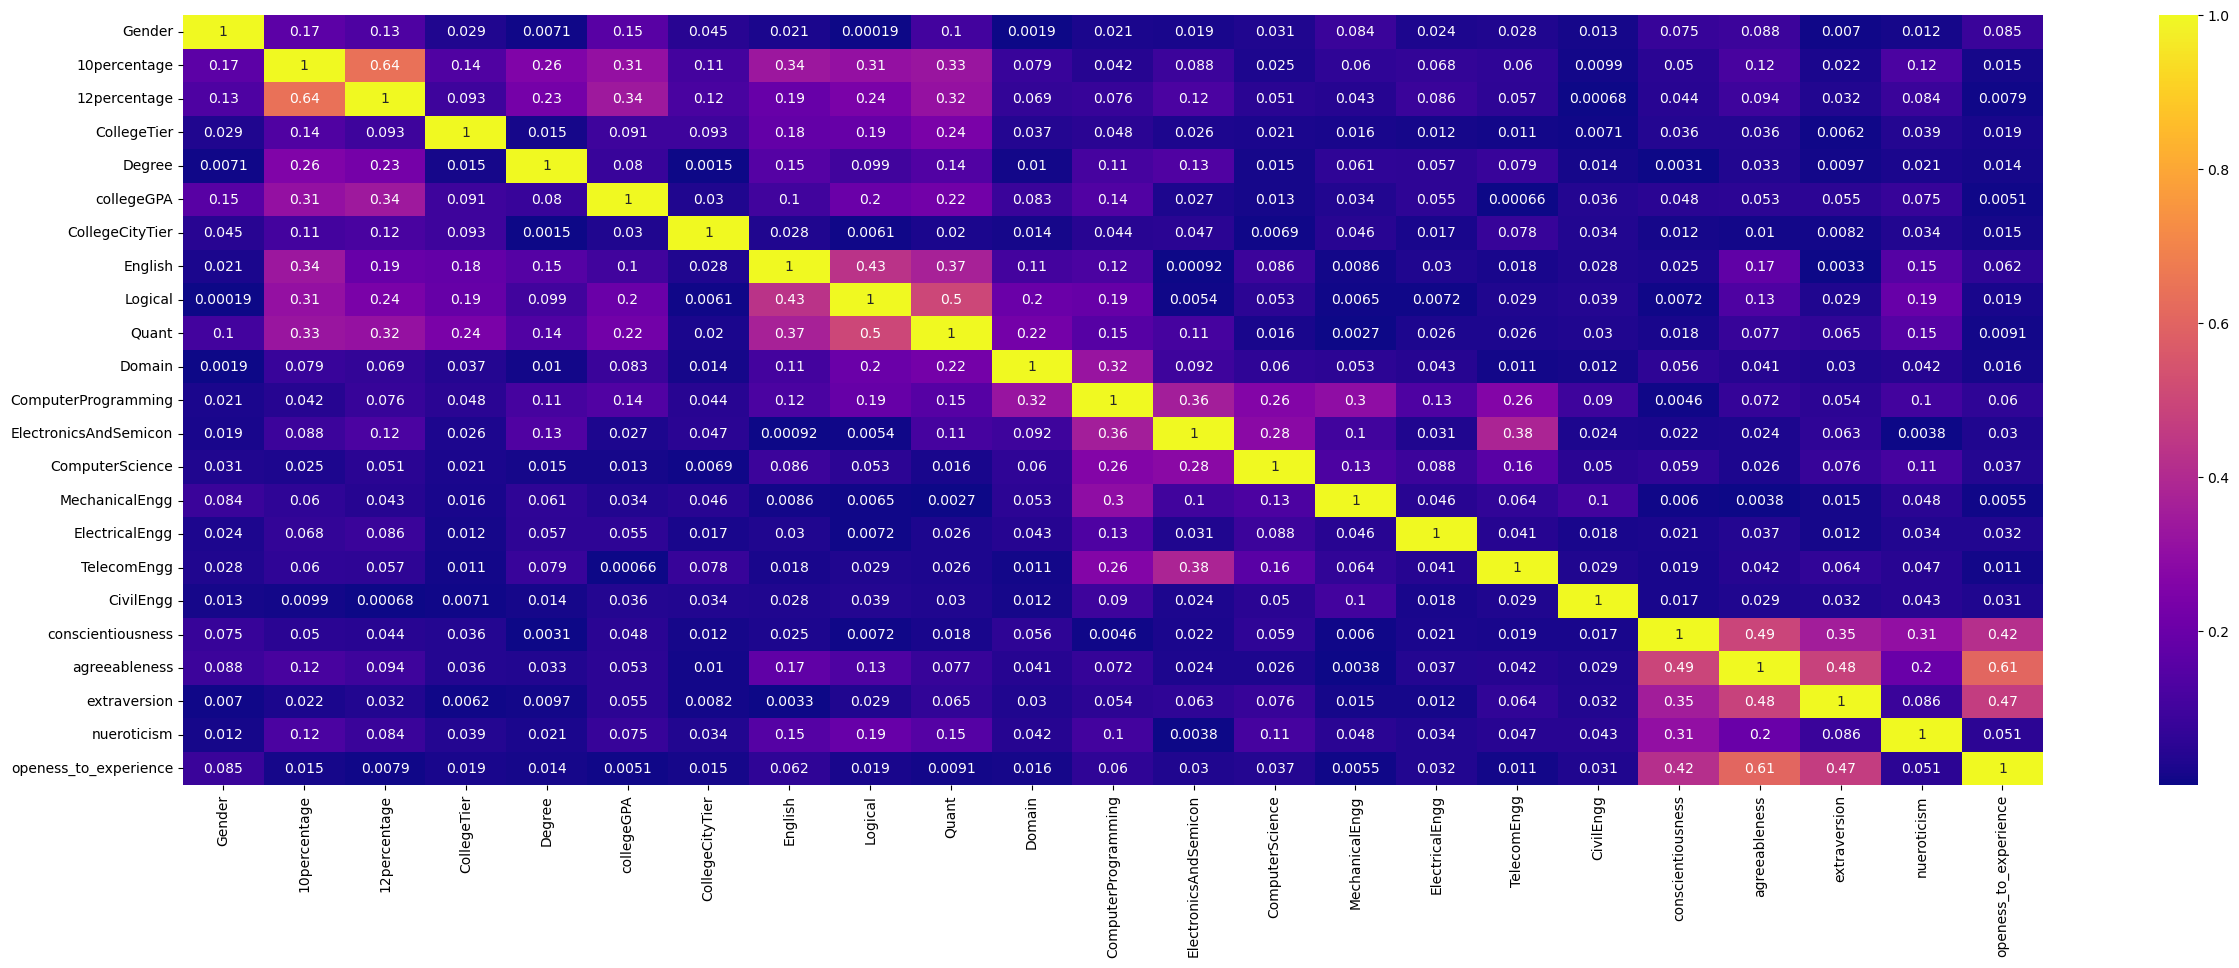

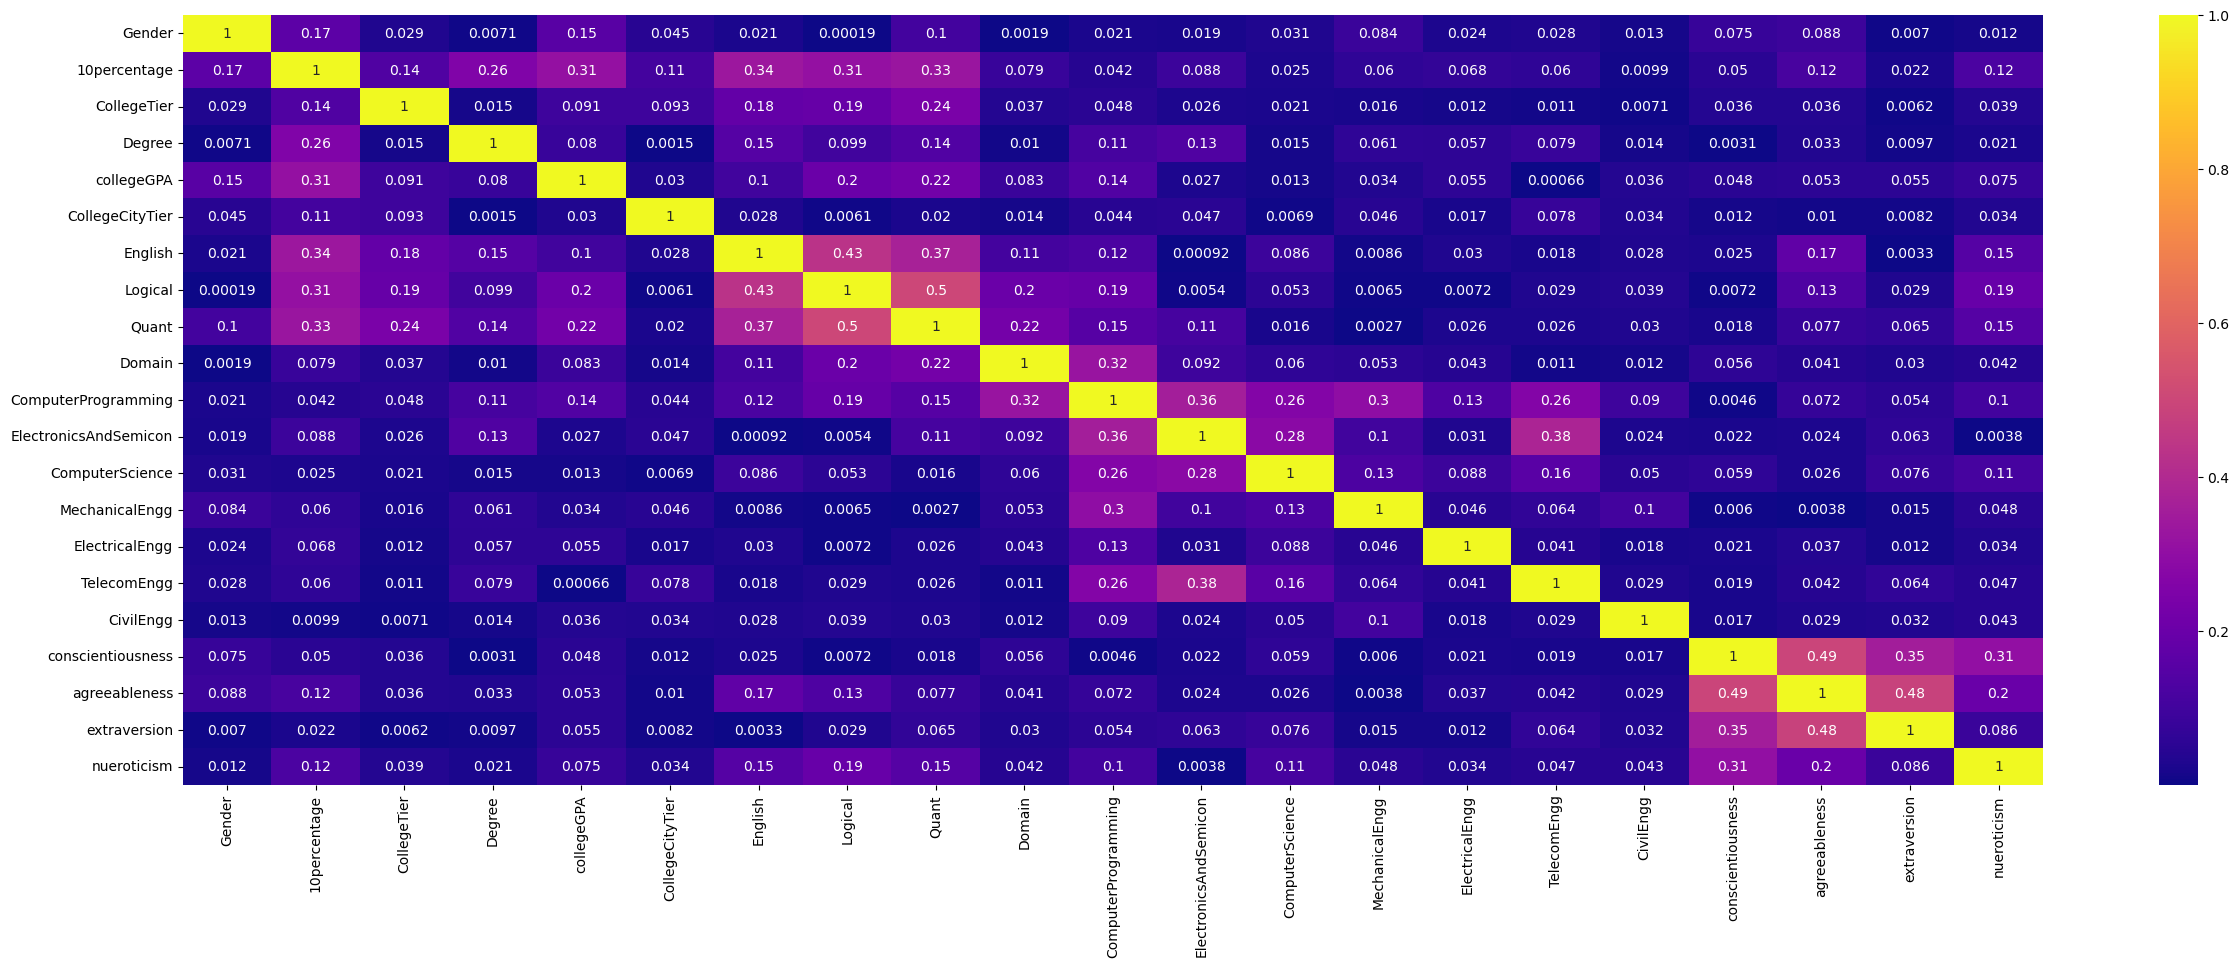

In [389]:
# create correlation matrix
corr_matrix = X_train.corr().abs()
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.show()
# get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# select features with correlation > 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Show the current heatmap after drop
plt.figure(figsize=(30,10))
sns.heatmap(X_train.drop(to_drop, axis=1).corr().abs(), annot=True, cmap='plasma')
plt.show()

### **AMCAT**

In [390]:
# AMCAT
X_AMCAT_train = np.hstack((X_train.iloc[:, 6:11].values ** 2, X_train.iloc[:, 12:18].values))
mae_AMCAT = []

kfold_cross_model(X_AMCAT_train, y_train, kf, mae_AMCAT)
print('MAE for AMCAT: ', np.mean(mae_AMCAT))

MAE for AMCAT:  118160.47834958011


### **Least correlated features**

In [391]:
X_LCF_train = np.array(X_train.drop(to_drop, axis=1))
mae_LCF = []

kfold_cross_model(X_LCF_train, y_train, kf, mae_LCF)
print("MAE: ", np.mean(mae_LCF))

MAE:  110608.51614315098


### **All features**

Modified:
- $\text{Grading} = 5\%  \text{10percentage} + 10\% \text{12percentage} + 85\% (\text{collegeGPA} \times \text{CollegeTier}^{2})$
- $\text{AMCAT Point} = 2 (\text{English} + \text{Logical} + \text{Quant}) + \text{Domain}(\text{ComputerProgramming} + \text{ElectronicsAndSemicon} + \text{ComputerScience} + \text{MechanicalEngg} + \text{ElectricalEngg} + \text{TelecomEngg} + \text{CivilEngg}) + {(\text{conscientiousness} + \text{agreeableness} + \text{extraversion} + \text{nueroticism} + \text{openess\_to\_experience})}^2$

Preprocessing

In [392]:
X_grading_train = np.array(0.05 * X_train['10percentage'] + 0.1 * X_train['12percentage'] + 0.85 * (X_train['collegeGPA'] * X_train['CollegeTier'] ** 2)).reshape(-1, 1)
X_ELQ_train = np.array(np.sum(X_train.iloc[:, 7:10] * 2, axis=1)).reshape(-1, 1)
X_GPA_train = np.array(X_train['Domain'] * np.sum(np.where(X_train.iloc[:, 11:18] == -1, 0, X_train.iloc[:, 11:18]), axis=1)).reshape(-1, 1)
X_Personality_train = np.array(np.sum(np.where(X_train.iloc[:, 18:] == -1, 0, X_train.iloc[:, 18:].abs()) ** 2, axis=1)).reshape(-1, 1)

Training model

In [393]:
X_All_features = np.hstack([X_grading_train, X_ELQ_train, X_GPA_train, X_Personality_train])
mae_All_features = []

kfold_cross_model(X_All_features, y_train, kf, mae_All_features)
print('MAE: ', np.mean(mae_All_features))

MAE:  116244.59803817324


In [394]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

In [395]:
X_LCF_test = X_test.drop(to_drop, axis=1)

# Train the model
model_LCF = OLSLinearRegression()
model_LCF.fit(X_LCF_train, y_train)

# Predict the test set
y_pred_LCF = model_LCF.predict(X_LCF_test)

# MAE
print("MAE: ", mae(y_test, y_pred_LCF))

MAE:  102190.45299469784


In [396]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$